# Analysis of dna dataset

In [58]:
library(entropy)
source("lda.R")

### How close is distribution of classes between the training and testing datasets?

In [59]:
library(dplyr)
for (i in 0:19) {
 dfs <- read_wlws(800, "waveform", i)
 v1 <- table(filter(dfs$train, class_id %in% c(2,4,7))$class_id)
 v2 <- table(dplyr::filter(dfs$test, class_id %in% c(2,4,7) )$class_id)
 v <- as.matrix(v1/sum(v1) - v2/sum(v2) )
 print(norm(v, "F"))
 print(KL.plugin(v1, v2))
}

[1] "unzips/n800/waveform.scale-0"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-1"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-2"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-3"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-4"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-5"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-6"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-7"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-8"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-9"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-10"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-11"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-12"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-13"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-14"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-15"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-16"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-17"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-18"
[1] 0
[1] 0
[1] "unzips/n800/waveform.scale-19"
[1] 0
[1] 0


In [60]:
dfs <- read_wlws(800, "segment", 7)

[1] "unzips/n800/segment.scale-7"


In [61]:
lda_multi(dfs)$multi

[1]   1   2 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   2   5 Inf
[1]   2   6 Inf
[1]   5   6 Inf
[1]   2   7 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   6   7 Inf


Warning message in fn(r[, , k]):
“stratified() : Maximum number of iterations reached without convergence 
 delta =1.02822e-39
 delta1= 1.02768e-39”


n,K,method,correct,dataset,run
<dbl>,<int>,<chr>,<int>,<chr>,<dbl>
800,7,normal,561,segment,7
800,7,radial,933,segment,7
800,7,wlw2,936,segment,7
800,7,oracle,932,segment,7


In [62]:
t1 <- lda_triples(dfs)
t2 <- t1 |> pivot_wider(names_from = "method", values_from = "acc") |> 
  mutate(imp = wlw2 - pmax(omit12, omit13, omit23)) |> arrange(desc(imp)) 
t2 |> print(n =7)

[1]   1   2 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   2   5 Inf
[1]   2   6 Inf
[1]   5   6 Inf
[1]   2   7 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   6   7 Inf
[1] 7
# A tibble: 35 × 10
      i     j     k normal radial  wlw2 omit12 omit13 omit23    imp
  <int> <int> <int>  <dbl>  <dbl> <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1     2     4     7  0.775  0.995 0.995  0.850  0.674  0.836 0.146 
2     2     6     7  0.876  0.995 0.995  0.809  0.911  0.937 0.0583
3     1     3     4  0.940  0.968 0.968  0.826  0.800  0.915 0.0528
4     1     2     4  0.745  0.995 0.995  0.893  0.718  0.977 0.0182
5     2     4     5  0.810  0.951 0.951  0.937  0.878  0.782 0.0141
6     1     4     5  0.865  0.947 0.944  0.930  0.840  0.867 0.0140
7     2     5     6  0.766  0.991 0.991  0.953  0.979  0.702 0.0118
# ℹ 28 more rows


In [63]:
W <- gen_W(qL = 3, n = 1000)

In [64]:
bcp <- get_bcp(dfs = dfs, i = 2, j = 4, k = 7)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


[1]   2   7 Inf


Warning message in lda.default(x, grouping, ...):
“variables are collinear”


### Crossvalidation of best ensemble (1,2,3)

In [65]:
r1 <- cv_stack(bcp = select_bcp(bcp, 1:3), W = W, score = "acc")
r1 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
378.2


In [66]:
r2 <- cv_stack(bcp = select_bcp(bcp, 1:3), W = W, score = "brier")
r2 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
346.6


In [67]:
r3 <- cv_stack(bcp = select_bcp(bcp, 1:3), W = W, score = "log")
r3 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
352.85


In [68]:
r1 |> group_by(best_w) |> summarize(m = n())  |> arrange(desc(m))

best_w,m
<int>,<int>
208,4
476,4
760,4
99,3
243,3
339,3
497,3
536,3
649,3


In [69]:
ac <- apply(eval_scores(select_bcp(bcp, 1:3), W = W, score = "acc")$scores, 2, mean)

In [70]:
max(ac)

[1] 0.8773148

In [71]:
ac[c(810, 902, 897, 625, 373, 72, 123)]

[1] 0.8773148 0.8750000 0.8518519 0.7754630 0.8495370 0.8750000 0.6736111

In [72]:
which.max(ac)

[1] 11

In [73]:
W[810,]

[1] 0.24 0.29 0.47

In [74]:
r3 |> group_by(best_w) |> summarize(m = n())  |> arrange(desc(m))

best_w,m
<int>,<int>
626,12
409,7
638,3
37,2
44,2
103,2
234,2
295,2
310,2


In [75]:
ac[c(112,960,585, 353,58,7,8)]

[1] 0.8495370 0.7777778 0.7754630 0.8750000 0.8750000 0.7777778 0.8750000

### Crossvalidation of best ensemble (1,2,4)

In [76]:
r4 <- cv_stack(bcp = select_bcp(bcp, c(1,2,4)), W = W, score = "acc")
r4 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
370.25


### Crossvalidation of best ensemble (1,3,4)

In [77]:
r5 <- cv_stack(bcp = select_bcp(bcp, c(1,3,4)), W = W, score = "acc")
r5 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
387.05


In [78]:
r6 <- cv_stack(bcp = select_bcp(bcp, c(1,3,4)), W = W, score = "acc")
r6 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
387.1


### Crossvalidation of best ensemble (2,3,4)

In [134]:
r7 <- cv_stack(bcp = select_bcp(bcp, c(2,3,4)), W = W, score = "acc")
r7 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
430


In [133]:
r17 <- cv_stack(bcp = select_bcp(bcp, c(2,3,4)), W = W, score = "brier")
r17 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
381.1


In [135]:
r27 <- cv_stack(bcp = select_bcp(bcp, c(2,3,4)), W = W, score = "log")
r27 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1]  432 1000


mean(m)
<dbl>
365.5


### Crossvalidation of best ensemble (1,2)

In [80]:
W1 <- matrix(seq(0,1, length.out = 51), ncol = 2, nrow = 51, byrow=F)
W1[,2] = 1 - W1[,1]

In [81]:
r8 <- cv_stack(bcp = select_bcp(bcp, 1:2), W = W1, score = "acc")

[1] 432  51


In [82]:
r8 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m)) |> print(n = 5)

# A tibble: 26 × 2
  best_w     m
   <int> <int>
1     10     7
2      8     6
3     14     6
4     21     6
5     26     6
# ℹ 21 more rows


In [83]:
r9 <- cv_stack(bcp = select_bcp(bcp, 1:2), W = W1, score = "brier")
r9 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m)) |> print(n = 5)

[1] 432  51
# A tibble: 14 × 2
  best_w     m
   <int> <int>
1     11    16
2      6    12
3      8    10
4      1     9
5     10     9
# ℹ 9 more rows


In [84]:
r10 <- cv_stack(bcp = select_bcp(bcp, 1:2), W = W1, score = "log")
r10 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m)) |> print(n = 5)

[1] 432  51
# A tibble: 29 × 2
  best_w     m
   <int> <int>
1      1    10
2      3     7
3      7     7
4     19     6
5     15     5
# ℹ 24 more rows


In [85]:
ac1 <- apply(eval_scores(select_bcp(bcp, 1:2), W = W1, score = "acc")$scores, 2, mean)

In [86]:
which.max(ac1)
max(ac1)
min(ac1)
which.min(ac1)
W1[1,]

[1] 26

[1] 0.8634259

[1] 0.775463

[1] 30

[1] 0 1

In [87]:
ac1[c(13,46,19,27,33)]

[1] 0.8495370 0.7754630 0.8518519 0.7777778 0.7754630

In [88]:
W1[c(22,24,31),]

0.42,0.58
0.46,0.54
0.60,0.40


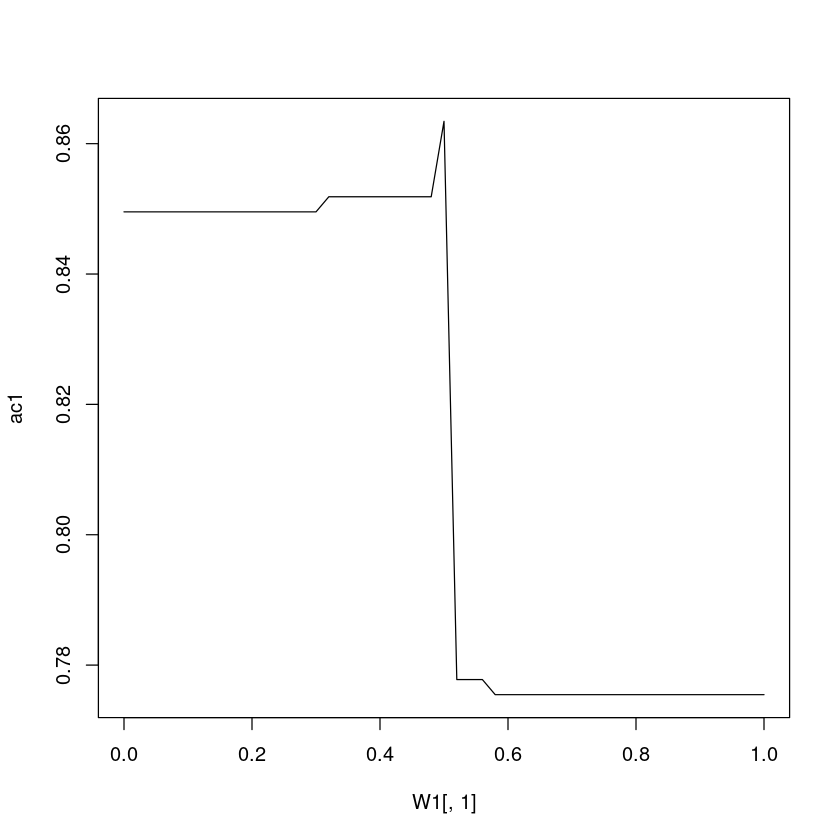

In [89]:
plot(W1[,1], ac1, type = "l")

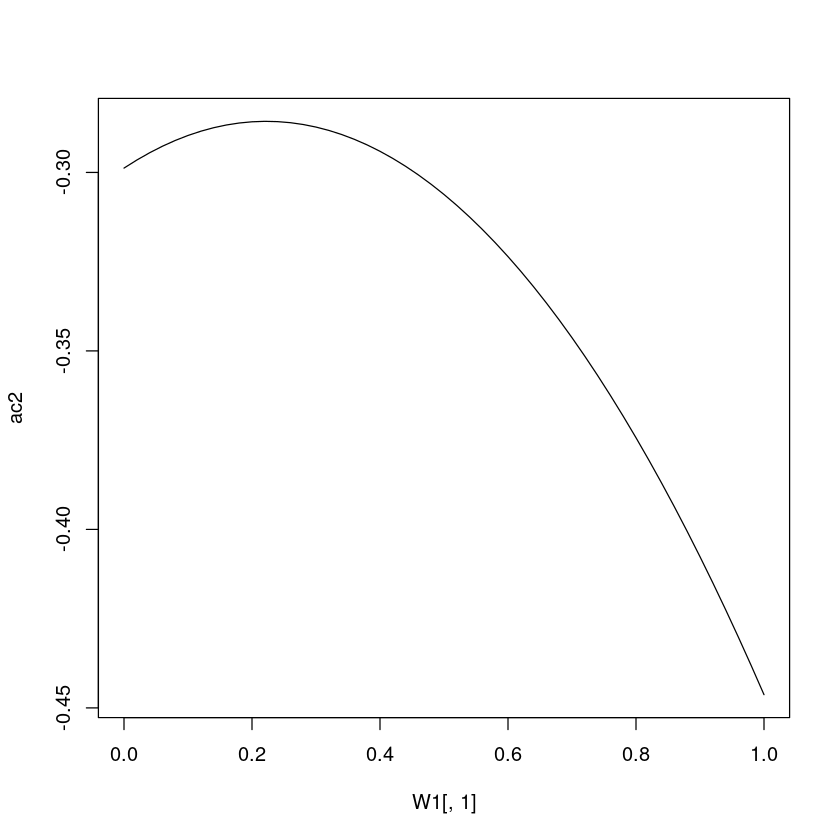

In [90]:
ac2 <- apply(eval_scores(select_bcp(bcp, 1:2), W = W1, score = "brier")$scores, 2, mean)
plot(W1[,1], ac2, type = "l")

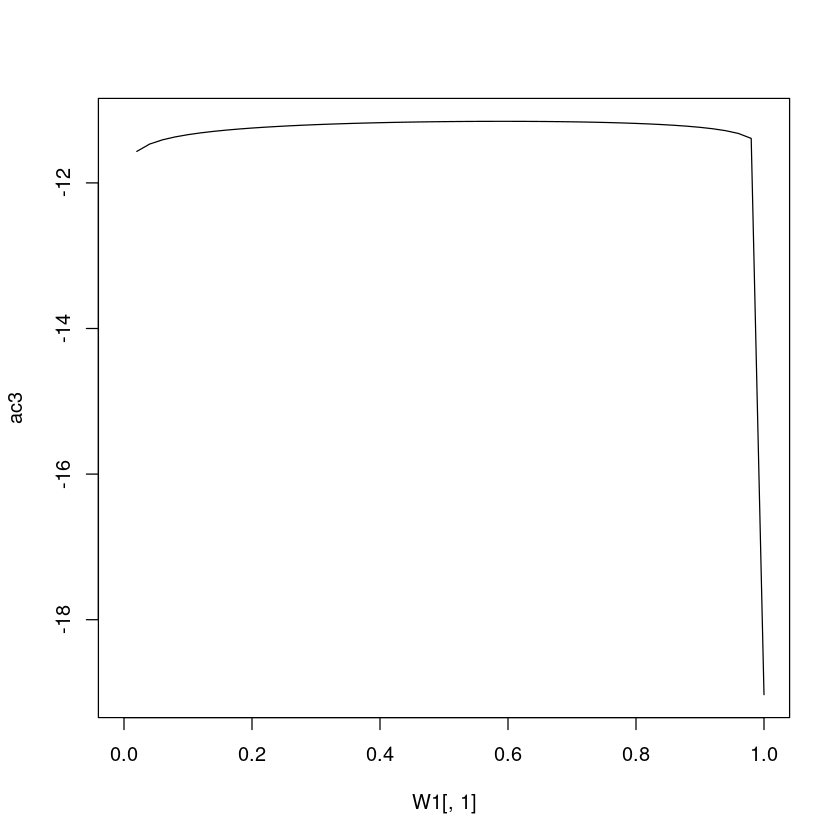

In [91]:
ac3 <- apply(eval_scores(select_bcp(bcp, 1:2), W = W1, score = "log")$scores, 2, mean)
plot(W1[,1], ac3, type = "l")

In [92]:
r8 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
367.5


In [93]:
r9 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
367


In [94]:
r10 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
366.2


## Full ensemble

In [102]:
W2 <- gen_W(qL = 4, n = 4000)
r11 <- cv_stack(bcp = select_bcp(bcp, 1:4), W = W2, score = "acc", reps = 40)

[1]  432 4000


In [103]:
r11 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
430


In [104]:
ac7 <- apply(eval_scores(select_bcp(bcp, 1:4), W = W2, score = "acc")$scores, 2, mean)
max(ac7)

[1] 0.9953704

In [105]:
which.max(ac7)

[1] 6

In [106]:
W2[6,]

[1] 0.07 0.29 0.22 0.42

In [110]:
r11 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m))  |> print(n = 25)

# A tibble: 158 × 2
   best_w     m
    <int> <int>
 1    729     4
 2    473     3
 3    911     3
 4   1176     3
 5    163     2
 6    187     2
 7    240     2
 8    321     2
 9    523     2
10    619     2
11    688     2
12    752     2
13    844     2
14    918     2
15   1132     2
16   1143     2
17   1244     2
18   1697     2
19   1715     2
20   1926     2
21   2051     2
22   2264     2
23   2267     2
24   2439     2
25   2575     2
# ℹ 133 more rows


In [111]:
ac7[c(729,473,911,1176,163,187)]

[1] 0.9953704 0.9953704 0.9953704 0.9953704 0.9953704 0.9953704

## Ensemble (2,4)

In [114]:
ac8 <- apply(eval_scores(select_bcp(bcp, c(2,4)), W = W1, score = "acc")$scores, 2, mean)

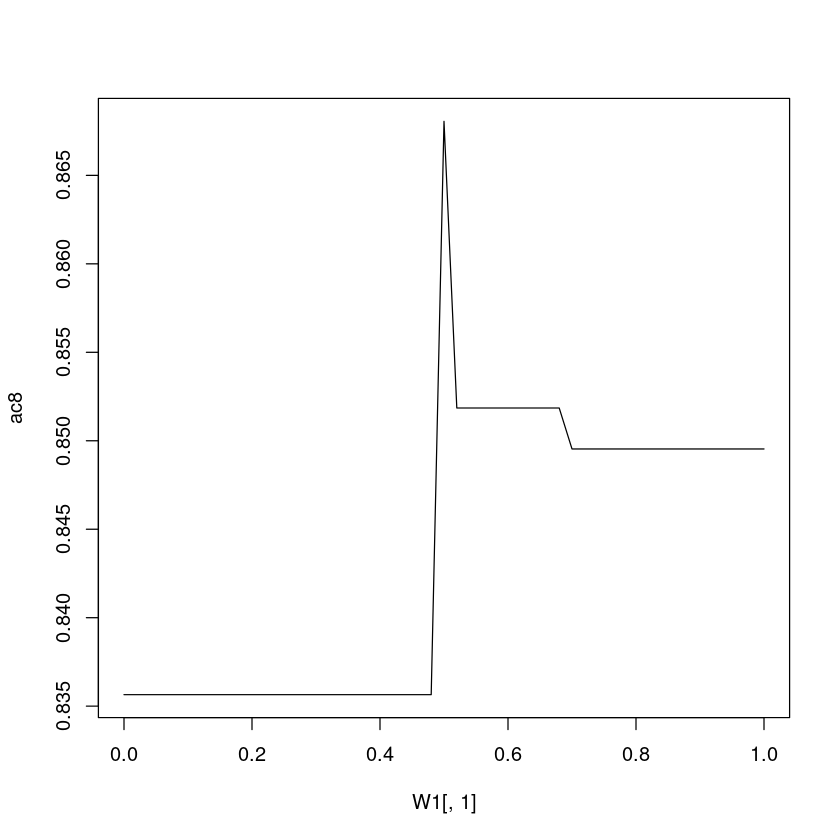

In [118]:
plot(W1[,1], ac8, type = "l")

In [116]:
length(ac8)

[1] 51

In [117]:
dim(W)

[1] 1000    3

In [119]:
ac9 <- apply(eval_scores(select_bcp(bcp, c(2,4)), W = W1, score = "brier")$scores, 2, mean)

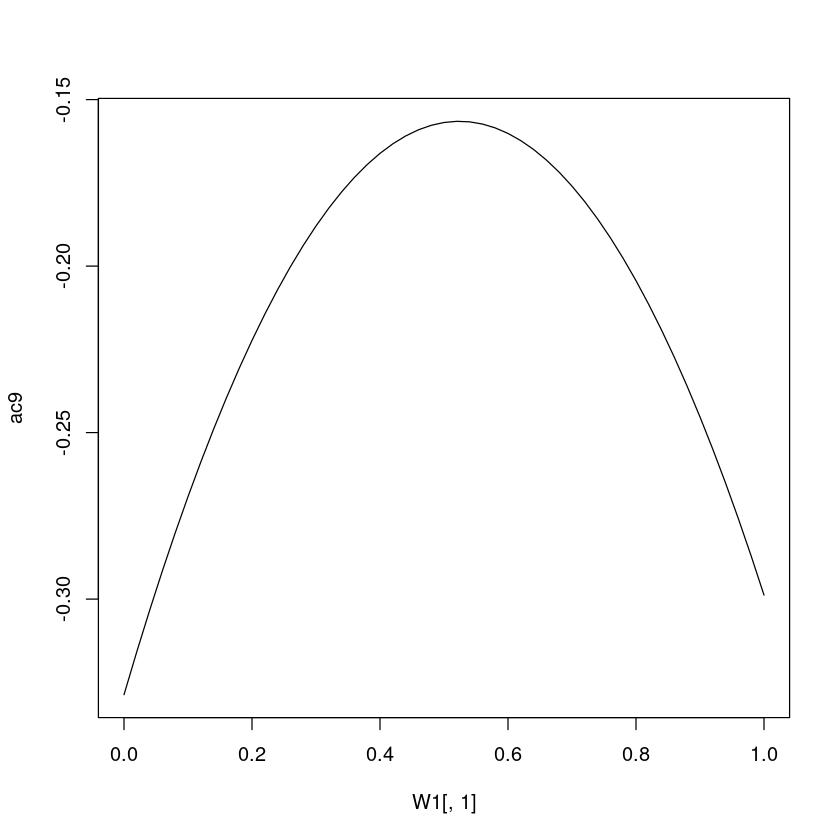

In [120]:
plot(W1[,1], ac9, type = "l")

In [127]:
c9 <- cv_stack(select_bcp(bcp, c(2,4)), W1,  score="log")

[1] 432  51


In [128]:
c9 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
360.9


In [130]:
dim(bcp$pl[[1]])

[1] 432   3

In [131]:
360.9/432.3

[1] 0.8348369

In [132]:
430/432

[1] 0.9953704